In [26]:
from keras.datasets import mnist
import numpy as np
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

In [27]:
mnist_x_train = mnist_x_train.astype('float32') / 255.
mnist_x_test = mnist_x_test.astype('float32') / 255.
mnist_x_train = mnist_x_train.reshape((len(mnist_x_train), np.prod(mnist_x_train.shape[1:])))
mnist_x_test = mnist_x_test.reshape((len(mnist_x_test), np.prod(mnist_x_test.shape[1:])))

In [28]:
import tensorflow_datasets as tfds
import numpy as np
kmnist_train, kmnist_test = tfds.as_numpy(tfds.load('kmnist', split=['train', 'test'], batch_size=-1, as_supervised=True))
kmnist_x_train, _ = kmnist_train
kmnist_x_test, _ = kmnist_test

In [29]:
kmnist_x_train = kmnist_x_train.astype('float32') / 255.
kmnist_x_test = kmnist_x_test.astype('float32') / 255.
kmnist_x_train = kmnist_x_train.reshape((len(kmnist_x_train), np.prod(kmnist_x_train.shape[1:])))
kmnist_x_test = kmnist_x_test.reshape((len(kmnist_x_test), np.prod(kmnist_x_test.shape[1:])))

In [30]:
x_test = np.concatenate((mnist_x_test, kmnist_x_test[0].reshape(1, 784)))
print(x_test.shape)

(10001, 784)


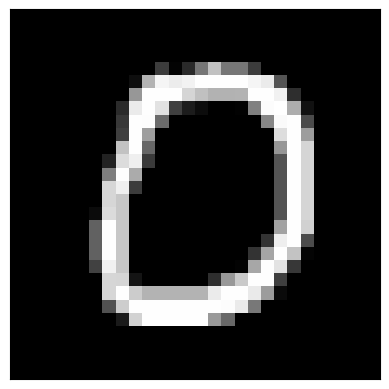

In [31]:
plt.gray()
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, 
                labelbottom = False) 
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, 
                labelleft = False)

plt.imshow(mnist_x_test[10].reshape(28, 28))

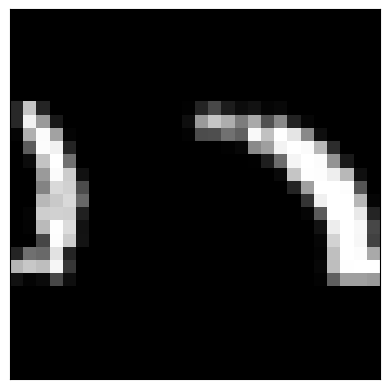

In [32]:
plt.gray()
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, 
                labelbottom = False) 
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, 
                labelleft = False)

plt.imshow(kmnist_x_test[0].reshape(28, 28))
plt.show()

In [33]:
autoencoder = load_model('autoencoder_model.h5')

encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('Encoded_Features').output)
encoded_input = Input(shape=(64,))
decoder_layer = autoencoder.get_layer('Decoded_Input')
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [34]:
encoded_imgs = encoder.predict(x_test)  
decoded_imgs = decoder.predict(encoded_imgs)
RE = ((x_test - decoded_imgs) ** 2).mean(axis=1)

In [35]:
RE_original = RE.copy()
RE[-1]

0.07079516

In [36]:
RE.sort()
print(RE[9990:])

[0.01635465 0.01643213 0.0170368  0.01712707 0.01727417 0.01727777
 0.01774301 0.01779799 0.0185659  0.01912333 0.07079516]


In [37]:
biggest_re_pos = np.argmax(RE_original)

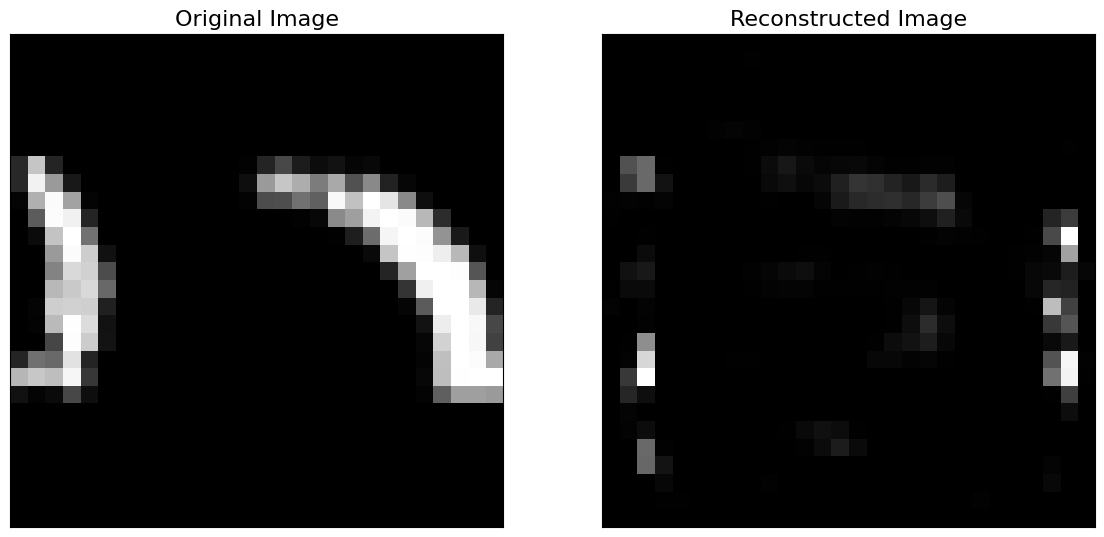

In [38]:
fig = plt.figure(figsize = (14, 7))

ax = fig.add_subplot(1, 2, 1)
plt.title('Original Image', fontsize = 16)

plt.gray()
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, 
                labelbottom = False) 
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, 
                labelleft = False)

plt.imshow(x_test[biggest_re_pos].reshape(28, 28))

ax = fig.add_subplot(1, 2, 2)
plt.title('Reconstructed Image', fontsize = 16)
plt.gray()
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, 
                labelbottom = False) 
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, 
                labelleft = False)

plt.imshow(decoded_imgs[biggest_re_pos].reshape(28, 28))

In [39]:
second_biggest_re_pos = list(RE_original).index(RE[-2])

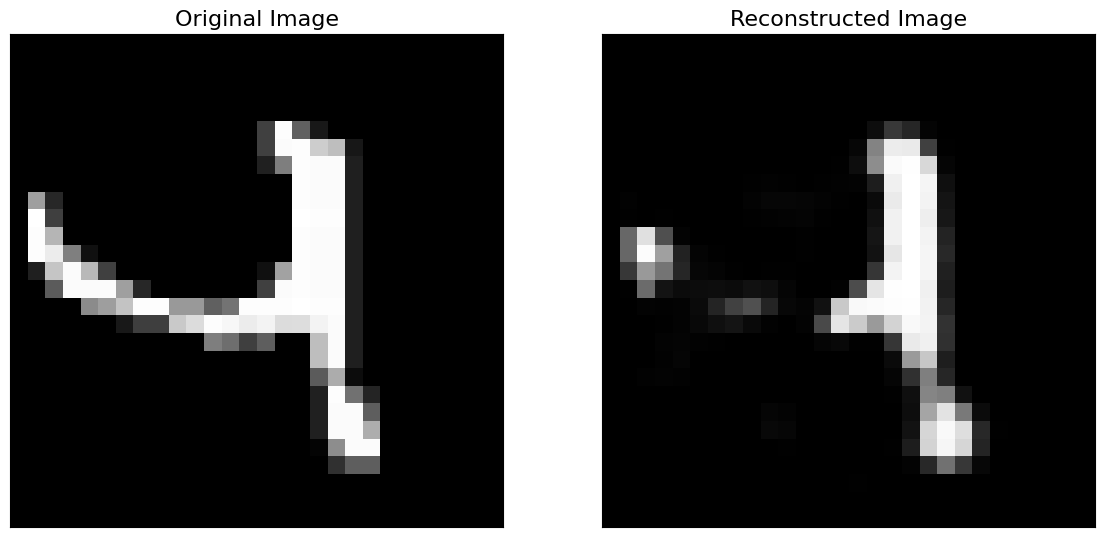

In [45]:
fig = plt.figure(figsize = (14, 7))

ax = fig.add_subplot(1, 2, 1)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, 
                labelbottom = False) 
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, 
                labelleft = False)
plt.title('Original Image', fontsize = 16)
plt.gray()
plt.imshow(x_test[second_biggest_re_pos].reshape(28, 28))

ax = fig.add_subplot(1, 2, 2)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, 
                labelbottom = False) 
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, 
                labelleft = False)
plt.title('Reconstructed Image', fontsize = 16)
plt.gray()
plt.imshow(decoded_imgs[second_biggest_re_pos].reshape(28, 28))

In [23]:
third_biggest_re_pos = list(RE_original).index(RE[-3])

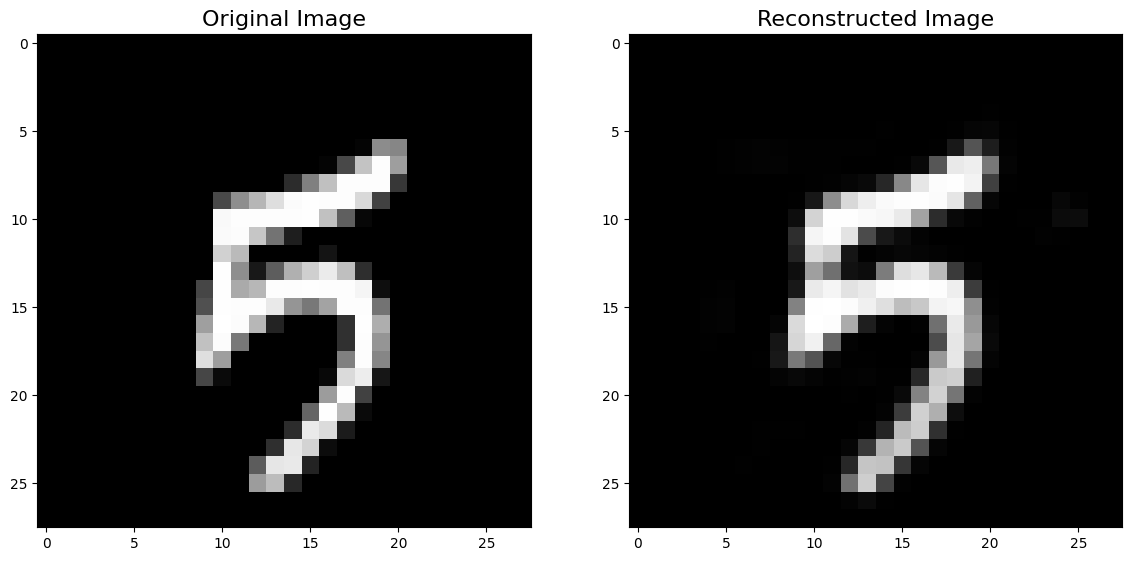

In [46]:
fig = plt.figure(figsize = (14, 7))

ax = fig.add_subplot(1, 2, 1)
plt.title('Original Image', fontsize = 16)
plt.gray()
plt.imshow(x_test[third_biggest_re_pos].reshape(28,28))

ax = fig.add_subplot(1, 2, 2)
plt.title('Reconstructed Image', fontsize = 16)
plt.gray()
plt.imshow(decoded_imgs[third_biggest_re_pos].reshape(28,28))